In [31]:
import os, pickle

# Set the file path
file_path = "XAXA"
fragments, fragments_id = [], []

for file in os.listdir(file_path):
    try:
        with open(file_path + "\\" + file,'rb') as f:
            fragment_dict = pickle.load(f)
            for fragment in fragment_dict["df_lsit"]:
                fragments.append(fragment)
            for label in fragment_dict["df_labels"]:
                fragments_id.append(label)
    except ValueError:
        print("Oops! There was a problem with file: " + file)

print("Total number of Fragmnets: " + str(len(fragments)))

Total number of Fragmnets: 12


3.0

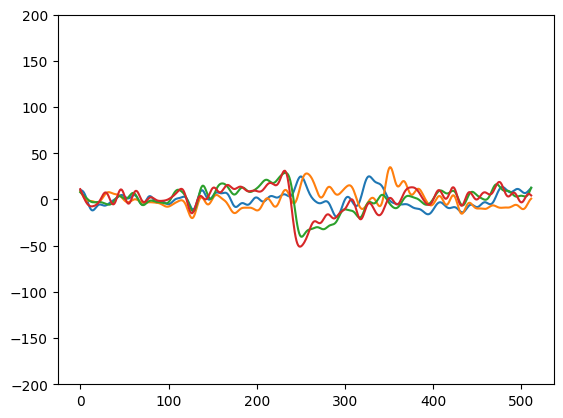

In [54]:
import matplotlib.pyplot as plt
kk=8
plt.ylim(-200,200)
plt.plot(fragments[kk])
fragments_id[kk]

# 1. Loading data Fragments
We start by loading the EEG fragments.

In [1]:
import os, pickle

# Set the file path
file_path = "Labeled_Fragments_Data"
fragments, fragments_id = [], []

for file in os.listdir(file_path):
    try:
        with open(file_path + "\\" + file,'rb') as f:
            fragment_dict = pickle.load(f)
            for fragment in fragment_dict["df_lsit"]:
                fragments.append(fragment)
            for label in fragment_dict["df_labels"]:
                fragments_id.append(label)
    except ValueError:
        print("Oops! There was a problem with file: " + file)

print("Total number of Fragmnets: " + str(len(fragments)))

Total number of Fragmnets: 357


Class 0 Size (Inaction): 140
Class 1 Size (Right): 60
Class 2 Size (Left): 58
Class 3 Size (Up): 45
Class 4 Size (Down): 54


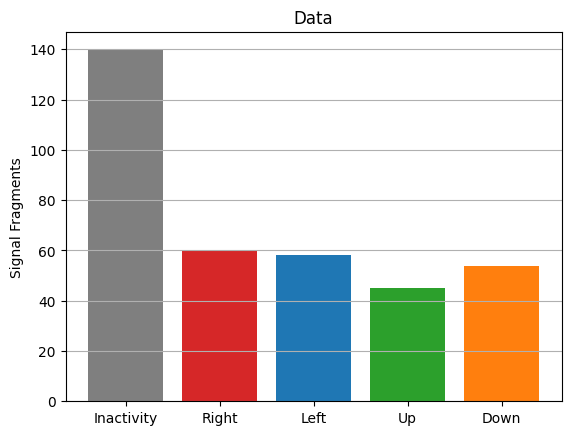

In [2]:
import matplotlib.pyplot as plt

# Init
class_0 = [] # Inactivity
class_1 = [] # Right
class_2 = [] # Left
class_3 = [] # Up
class_4 = [] # Down

for i in range(len(fragments)):
    if(fragments_id[i]==0): class_0.append(fragments[i].to_numpy())
    elif(fragments_id[i]==1): class_1.append(fragments[i].to_numpy())
    elif(fragments_id[i]==2): class_2.append(fragments[i].to_numpy())
    elif(fragments_id[i]==3): class_3.append(fragments[i].to_numpy())
    elif(fragments_id[i]==4): class_4.append(fragments[i].to_numpy())

# Print
print("Class 0 Size (Inaction): " + str(len(class_0)))
print("Class 1 Size (Right): " + str(len(class_1))), print("Class 2 Size (Left): " + str(len(class_2)))
print("Class 3 Size (Up): " + str(len(class_3))), print("Class 4 Size (Down): " + str(len(class_4)))

# Plot
fig, ax = plt.subplots()
mvmnt_classes = ['Inactivity', 'Right', 'Left', 'Up', 'Down']
counts = [len(class_0), len(class_1), len(class_2), len(class_3), len(class_4)]
bar_colors = ['tab:grey', 'tab:red', 'tab:blue', 'tab:green', 'tab:orange']
ax.grid(axis='y')
ax.bar(mvmnt_classes, counts, color=bar_colors)
ax.set_ylabel('Signal Fragments')
ax.set_title('Data')
plt.show()



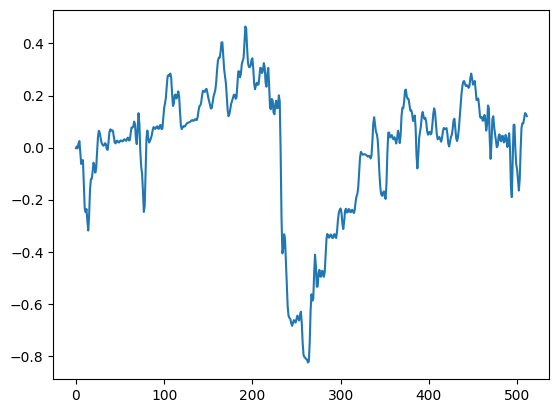

In [42]:
from scipy import signal
import numpy as np
eeg_signal=class_2[3][:,1]
plt.plot(eeg_signal)

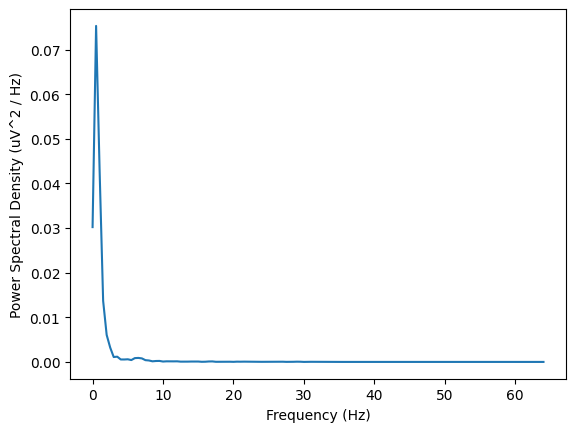

In [43]:
import matplotlib.pyplot as plt
from matplotlib.mlab import psd
import numpy as np

# Load the EEG signal (assuming it's stored in a NumPy array called 'eeg_signal')
# ...

# Set the sampling frequency
fs = 128

# Compute the PSD of the EEG signal using Welch's method with a window size of 2 seconds and 50% overlap
window_size = 2 * fs
overlap = 0.5
psd_values, frequencies = psd(eeg_signal, Fs=fs, NFFT=window_size, window=np.hanning(window_size), noverlap=int(window_size*overlap))

# Plot the PSD
plt.figure()
plt.plot(frequencies, psd_values)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (uV^2 / Hz)')
plt.show()

In [32]:
from scipy.signal import stft
# Set the sampling frequency (assuming it's 250 Hz)
fs = 128
# Define the frequency ranges of interest for the five main bands
delta_band = (0.5, 4)
theta_band = (4, 8)
alpha_band = (8, 13)
beta_band = (13, 30)

# Compute the power spectral density (PSD) of the EEG signal using Welch's method
frequencies, psd = signal.welch(eeg_signal, fs=fs, nperseg=fs*2)

# Find the indices corresponding to the frequency ranges of interest
delta_idx = np.logical_and(frequencies >= delta_band[0], frequencies < delta_band[1])
theta_idx = np.logical_and(frequencies >= theta_band[0], frequencies < theta_band[1])
alpha_idx = np.logical_and(frequencies >= alpha_band[0], frequencies < alpha_band[1])
beta_idx = np.logical_and(frequencies >= beta_band[0], frequencies < beta_band[1])


# Compute the total power in each frequency band by integrating the PSD over the corresponding frequency range
delta_power = np.trapz(psd[delta_idx], frequencies[delta_idx])
theta_power = np.trapz(psd[theta_idx], frequencies[theta_idx])
alpha_power = np.trapz(psd[alpha_idx], frequencies[alpha_idx])
beta_power = np.trapz(psd[beta_idx], frequencies[beta_idx])


# Normalize the power in each frequency band by the total power in the signal
total_power = np.trapz(psd, frequencies)
delta_power_norm = delta_power / total_power
theta_power_norm = theta_power / total_power
alpha_power_norm = alpha_power / total_power
beta_power_norm = beta_power / total_power


# Print the results
print(f"Delta power: {delta_power_norm:.2f}")
print(f"Theta power: {theta_power_norm:.2f}")
print(f"Alpha power: {alpha_power_norm:.2f}")
print(f"Beta power: {beta_power_norm:.2f}")




Delta power: 0.72
Theta power: 0.02
Alpha power: 0.01
Beta power: 0.01


In [3]:
from tools.feature_extraction_tool import *
hh=extract_bands(class_1[3],128)

asdasdasdasd


ValueError: Invalid cutoff frequency: frequencies must be greater than 0 and less than fs/2.

In [3]:
X, Y = [],[]
X_predict, Y_predict = [],[]

# Create Training data
for i in range(0,40): 
    X.append(class_0[i]), Y.append(0) # Class 0
    X.append(class_1[i]), Y.append(1) # Class 1
    X.append(class_2[i]), Y.append(2) # Class 2
    X.append(class_3[i]), Y.append(3) # Class 3
    X.append(class_4[i]), Y.append(4) # Class 4

# Create Prediction data
for i in range(40,110): X_predict.append(class_0[i]), Y_predict.append(0) # Class 0
for i in range(40,60): 
    X_predict.append(class_1[i]), Y_predict.append(1) # Class 1
    X_predict.append(class_2[i]), Y_predict.append(2) # Class 2
for i in range(40,47): X_predict.append(class_3[i]), Y_predict.append(3) # Class 3
for i in range(40,56): X_predict.append(class_4[i]), Y_predict.append(4) # Class 4

import numpy as np
import tensorflow as tf

#X_data, Label = np.array(X), tf.keras.utils.to_categorical(Y, num_classes=5, dtype="int")
#X_predict, Y_predict = np.array(X_predict), tf.keras.utils.to_categorical(Y_predict, num_classes=5, dtype="int")
X_data, Label = np.array(X),np.array(Y)
Label = np.reshape(Label,Label.shape)
X_predict, Y_predict = np.array(X_predict), np.array(Y_predict)

# Shufle
from sklearn.utils import shuffle
X_data, Label = shuffle(X_data, Label)
X_predict, Y_predict = shuffle(X_predict, Y_predict)

# Print Shape
print(X_data.shape)
print(Label.shape)
print(X_predict.shape)
print(Y_predict.shape)

(200, 512, 4)
(200,)
(133, 512, 4)
(133,)


In [10]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout, Activation, BatchNormalization,Lambda,SimpleRNN
from keras import metrics
from keras.regularizers import l2, l1
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model

def create_model(model_id:int,timesteps:int,channels_num:int,model_output:int):
    
    if(model_id==1):
        # Define model architecture
        model = Sequential(name='model_XXX')
        model.add(LSTM(64, input_shape=(timesteps, channels_num)))
        model.add(Dropout(0.5))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(model_output, activation='softmax'))

    if(model_id==2):
        
        # Define model architecture
        model = Sequential()
        model.add(LSTM(128, return_sequences=True, input_shape=(timesteps, channels_num)))
        model.add(Dropout(0.5))
        model.add(BatchNormalization())
        model.add(LSTM(128))
        model.add(Dropout(0.5))
        model.add(Dense(64, activation='relu',kernel_regularizer='l1'))
        model.add(Dropout(0.5))
        model.add(Dense(model_output, activation='softmax'))


    if(model_id==3):
        # Define model architecture
        model = Sequential(name='model_LSTM')
        model.add(SimpleRNN(64, return_sequences=False, dropout=0.3, input_shape=(timesteps, channels_num)))

        #model.add(BatchNormalization())
        model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
        model.add(Dropout(0.3))
        model.add(Dense(model_output, activation='softmax'))

    if(model_id==4):
        # Define model architecture
        model = Sequential(name='model_LSTM')
        model.add(LSTM(64, return_sequences=True, dropout=0.3, input_shape=(timesteps, channels_num)))
        model.add(LSTM(32, return_sequences=False, dropout=0.3))
        #model.add(BatchNormalization())
        model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
        model.add(Dropout(0.3))
        model.add(Dense(model_output, activation='softmax'))
    return model
    
    

In [16]:
def plot1(history):
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
def plot2(history):
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('categorical_crossentropy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

Model: "model_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 64)                4416      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 5)                 165       
                                                                 
Total params: 6,661
Trainable params: 6,661
Non-trainable params: 0
_________________________________________________________________
1
Epoch 1/100
10/10 [==============================] - 4s 271ms/step - loss: 2.0553 - accuracy: 0.2188 - sparse_categorical_accuracy: 0.2188
Epoch 2/100
10/10 [==========================

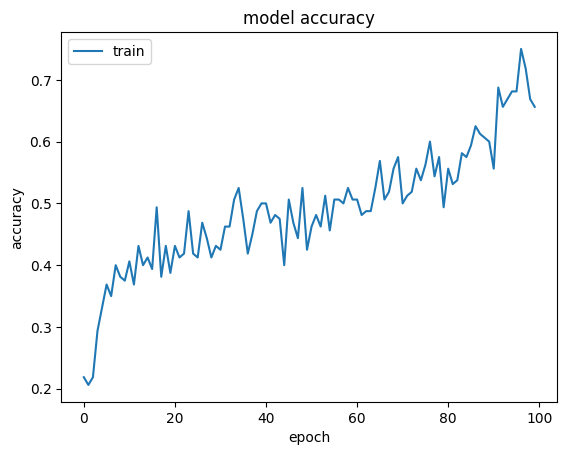

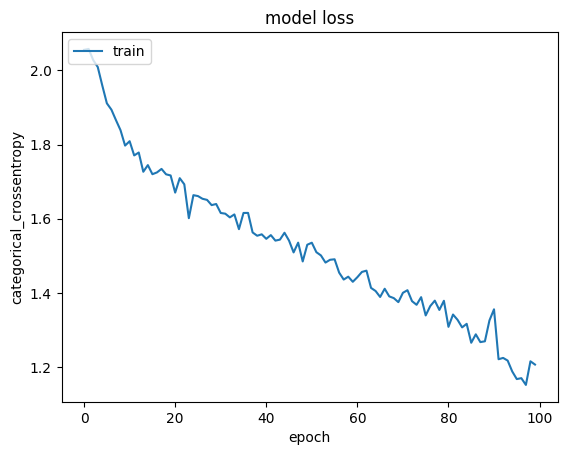

ACC: 0.7749999761581421
2
Epoch 1/100
10/10 [==============================] - 4s 261ms/step - loss: 2.0840 - accuracy: 0.2125 - sparse_categorical_accuracy: 0.2125
Epoch 2/100
10/10 [==============================] - 3s 257ms/step - loss: 2.0418 - accuracy: 0.2438 - sparse_categorical_accuracy: 0.2438
Epoch 3/100
10/10 [==============================] - 3s 258ms/step - loss: 2.0076 - accuracy: 0.2313 - sparse_categorical_accuracy: 0.2313
Epoch 4/100
 8/10 [=======================>......] - ETA: 0s - loss: 1.9938 - accuracy: 0.2734 - sparse_categorical_accuracy: 0.2734

KeyboardInterrupt: 

In [14]:
from sklearn.model_selection import StratifiedKFold
from keras import backend as K
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)
cvscores = []


counter = 1
for train, test in kfold.split(X_data, Label):
    
    # Create model
    model = create_model(model_id = 3,
                        timesteps = X_data.shape[1], channels_num = X_data.shape[2],
                        model_output = 5)
    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy',
                optimizer= Adam(learning_rate=0.0001),
                metrics=["accuracy","sparse_categorical_accuracy"]) #'categorical_crossentropy'  'mean_absolute_error'
    if(counter==1): 
        model.summary()
        plot_model(model, to_file='Images\\model_plot.png', show_shapes=True, show_layer_names=True)
    print(counter)
    
    # Fit the model
    history = model.fit(x = X_data[train], y = Label[train],epochs = 100, batch_size = 16, shuffle=True, verbose=1) #validation_split = 0.2,
    
    plot1(history), plot2(history)
    scores = model.evaluate(X_data[test], Label[test], verbose=0)
    model.add(Lambda(lambda x: K.cast(K.argmax(x), dtype='int32'), name='y_pred'))
    print("ACC: " + str(scores[1]))
    counter = counter + 1
    cvscores.append(scores[1]*100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))



Epoch 1/300
10/10 [==============================] - 4s 337ms/step - loss: 2.0192 - accuracy: 0.2625 - val_loss: 2.0137 - val_accuracy: 0.2500
Epoch 2/300
10/10 [==============================] - 3s 296ms/step - loss: 2.0001 - accuracy: 0.2812 - val_loss: 1.9878 - val_accuracy: 0.3000
Epoch 3/300
10/10 [==============================] - 3s 294ms/step - loss: 1.9790 - accuracy: 0.2500 - val_loss: 1.9601 - val_accuracy: 0.3250
Epoch 4/300
10/10 [==============================] - 3s 294ms/step - loss: 1.9115 - accuracy: 0.3625 - val_loss: 1.9212 - val_accuracy: 0.4000
Epoch 5/300
10/10 [==============================] - 3s 302ms/step - loss: 1.8887 - accuracy: 0.3938 - val_loss: 1.8542 - val_accuracy: 0.4000
Epoch 6/300
10/10 [==============================] - 3s 290ms/step - loss: 1.8075 - accuracy: 0.4750 - val_loss: 1.8372 - val_accuracy: 0.4500
Epoch 7/300
10/10 [==============================] - 3s 281ms/step - loss: 1.7792 - accuracy: 0.4688 - val_loss: 1.8517 - val_accuracy: 0.4500

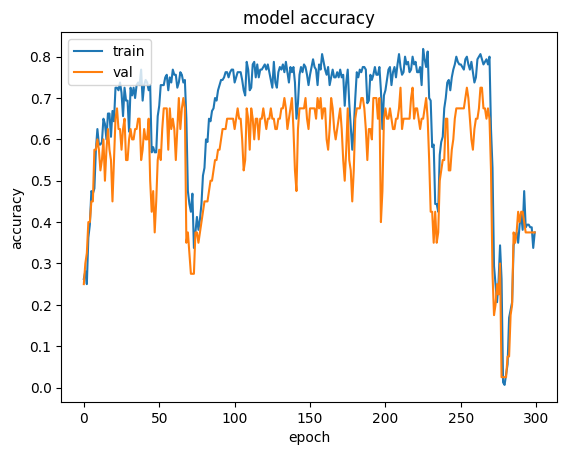

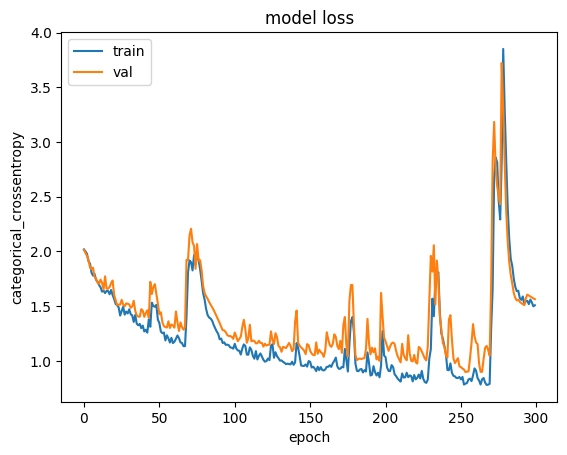

In [17]:
from sklearn.utils import shuffle
X_data, Label = shuffle(X_data, Label)
X_predict, Y_predict = shuffle(X_predict, Y_predict)

# Create model
model = create_model(model_id = 3,
                        timesteps = X_data.shape[1], channels_num = X_data.shape[2],
                        model_output = 5)
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
                optimizer= Adam(learning_rate=0.0001),
                metrics=["accuracy"]) 
# Fit the model
history = model.fit(x = X_data, y = Label, epochs = 300, batch_size = 16, validation_split = 0.2, shuffle=True, verbose=1) 
    
plot1(history), plot2(history)

model.add(Lambda(lambda x: K.cast(K.argmax(x), dtype='int32'), name='y_pred'))

In [10]:
predictions = model.predict(X_predict,batch_size=1,verbose=0)



In [92]:
predictions, Y_predict

(array([4, 0, 1, 0, 0, 0, 4, 0, 2, 3, 2, 0, 4, 4, 0, 4, 1, 0, 0, 2, 2, 0,
        0, 0, 1, 0, 0, 0, 2, 0, 4, 1, 1, 2, 3, 0, 0, 1, 2, 0, 4, 0, 4, 2,
        0, 0, 4, 0, 0, 0, 2, 1, 1, 1, 2, 3, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
        2, 0, 2, 3, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 0, 4, 0, 0, 4, 3, 0, 0,
        0, 0, 2, 0, 0, 0, 4, 2, 0, 3, 4, 4, 2, 0, 0, 3, 2, 0, 2, 0, 1, 1,
        3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 1, 4, 0, 2,
        0]),
 array([0, 0, 1, 0, 0, 0, 4, 0, 2, 3, 2, 0, 4, 4, 0, 4, 0, 0, 0, 2, 2, 0,
        0, 0, 1, 0, 0, 0, 2, 0, 4, 1, 1, 2, 3, 0, 0, 1, 2, 0, 4, 0, 4, 2,
        0, 0, 4, 0, 0, 0, 2, 1, 1, 1, 2, 3, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
        4, 0, 2, 3, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 0, 4, 0, 0, 4, 3, 0, 0,
        0, 0, 0, 0, 0, 0, 4, 2, 0, 3, 4, 4, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1,
        3, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 4,
        0]))

In [11]:

counter = 0 
for i in range(len(Y_predict)):
    if(Y_predict[i]==predictions[i]): counter +=1
print(str(counter)+"/"+str(len(Y_predict)))

115/133


Confusion matrix, without normalization
[[55  1  3  6  5]
 [ 0 20  0  0  0]
 [ 0  0 20  0  0]
 [ 3  0  0  4  0]
 [ 0  0  0  0 16]]


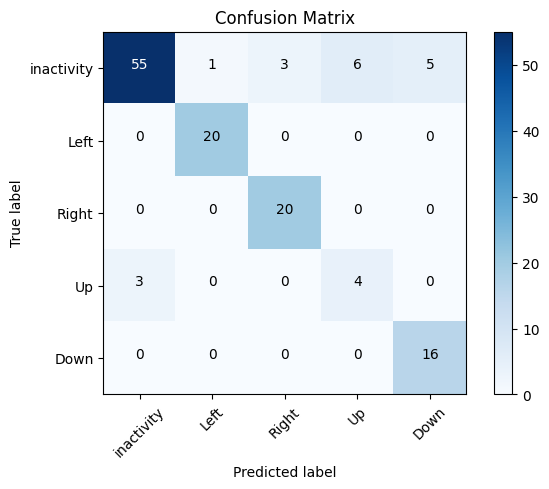

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(y_true=Y_predict,y_pred=predictions)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm_plot_labels = ['inactivity','Left','Right','Up','Down']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')